In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
import numpy
import cv2

In [21]:
PATH = "./dataset"
train_images = []
train_labels = []
test_images = []
test_labels = []

In [24]:
for folder in os.listdir(PATH):
    if folder == "Humans":
        label = 0
    elif folder == ".DS_Store":
        continue
    else:
        label = 1
    folder_len = len(os.listdir(f"{PATH}/{folder}"))
    for (idx, img) in enumerate(os.listdir(f"{PATH}/{folder}")):
        if img == ".DS_Store":
            continue
        print(f"Processing {folder}/{img}")
        image = cv2.imread(f"{PATH}/{folder}/{img}")
        image = cv2.resize(image, (100, 100))
        if idx < folder_len * 0.8:
            train_images.append(image)
            train_labels.append(label)
        else:
            test_images.append(image)
            test_labels.append(label)

Processing zhiqi/zhiqi-1216.jpg
Processing zhiqi/zhiqi-559.jpg
Processing zhiqi/zhiqi-203.jpg
Processing zhiqi/zhiqi-84.jpg
Processing zhiqi/zhiqi-565.jpg
Processing zhiqi/zhiqi-571.jpg
Processing zhiqi/zhiqi-90.jpg
Processing zhiqi/zhiqi-47.jpg
Processing zhiqi/zhiqi-53.jpg
Processing zhiqi/zhiqi-983.jpg
Processing zhiqi/zhiqi-1014.jpg
Processing zhiqi/zhiqi-1000.jpg
Processing zhiqi/zhiqi-997.jpg
Processing zhiqi/zhiqi-767.jpg
Processing zhiqi/zhiqi-1028.jpg
Processing zhiqi/zhiqi-773.jpg
Processing zhiqi/zhiqi-798.jpg
Processing zhiqi/zhiqi-940.jpg
Processing zhiqi/zhiqi-954.jpg
Processing zhiqi/zhiqi-968.jpg
Processing zhiqi/zhiqi-149.jpg
Processing zhiqi/zhiqi-1160.jpg
Processing zhiqi/zhiqi-1174.jpg
Processing zhiqi/zhiqi-613.jpg
Processing zhiqi/zhiqi-175.jpg
Processing zhiqi/zhiqi-1148.jpg
Processing zhiqi/zhiqi-161.jpg
Processing zhiqi/zhiqi-607.jpg
Processing zhiqi/zhiqi-834.jpg
Processing zhiqi/zhiqi-820.jpg
Processing zhiqi/zhiqi-808.jpg
Processing zhiqi/zhiqi-439.jpg
Proce

In [25]:
import random
for i in range(len(train_images)):
    rand = random.randint(0, len(train_images) - 1)
    train_images[i], train_images[rand] = train_images[rand], train_images[i]
    train_labels[i], train_labels[rand] = train_labels[rand], train_labels[i]

In [26]:
train_images = numpy.array(train_images)
train_labels = numpy.array(train_labels)
test_images = numpy.array(test_images)
test_labels = numpy.array(test_labels)

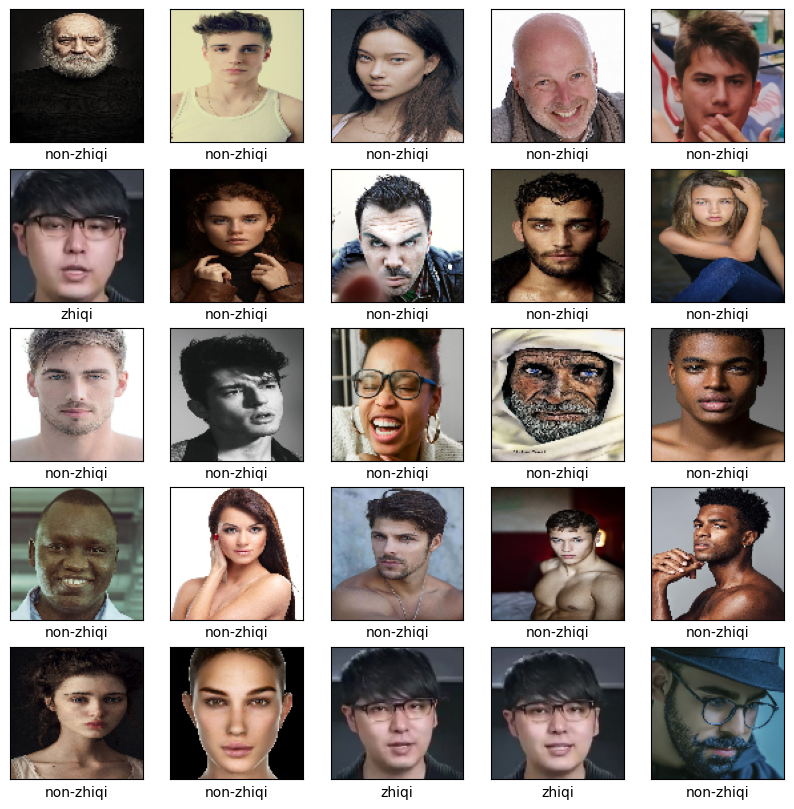

In [27]:
import matplotlib.pyplot as plt
import random
class_names = {1: "zhiqi", 0: "non-zhiqi"}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rand = random.randint(0, len(train_images))
    img = cv2.cvtColor(train_images[rand], cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[rand]])
plt.show()


In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 dropout_4 (Dropout)         (None, 47, 47, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 32)        9248      
                                                      

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [30]:
print(train_images.shape)
print(train_labels.shape )

(6685, 100, 100, 3)
(6685,)


In [31]:
history = model.fit(train_images, train_labels[..., None], epochs=10, 
                    validation_data=(test_images, test_labels[..., None]),
                    callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./logs', update_freq='batch')])


Epoch 1/10
209/209 [==============================] - 48s 226ms/step - loss: 2.4595 - accuracy: 0.9705 - val_loss: 0.4691 - val_accuracy: 0.7575
Epoch 2/10
209/209 [==============================] - 49s 237ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.2414 - val_accuracy: 0.8844
Epoch 3/10
209/209 [==============================] - 54s 256ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0199 - val_accuracy: 0.9982
Epoch 4/10
209/209 [==============================] - 59s 280ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.0477 - val_accuracy: 0.9886
Epoch 5/10
209/209 [==============================] - 48s 229ms/step - loss: 1.2466e-05 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9892
Epoch 6/10
209/209 [==============================] - 47s 224ms/step - loss: 0.0367 - accuracy: 0.9939 - val_loss: 0.0144 - val_accuracy: 0.9964
Epoch 7/10
209/209 [==============================] - 47s 223ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0855 - va

53/53 - 3s - loss: 0.0598 - accuracy: 0.9876 - 3s/epoch - 54ms/step


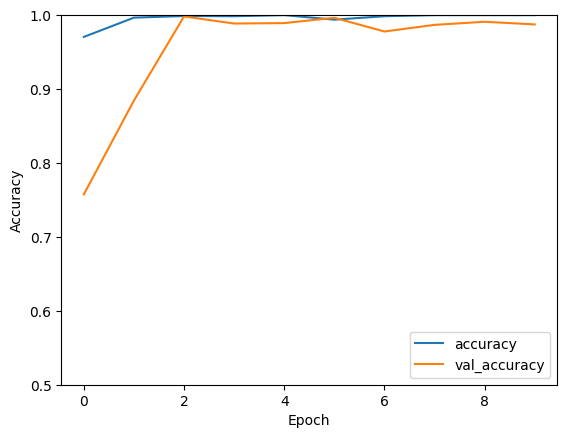

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

53/53 [==============================] - 2s 36ms/step


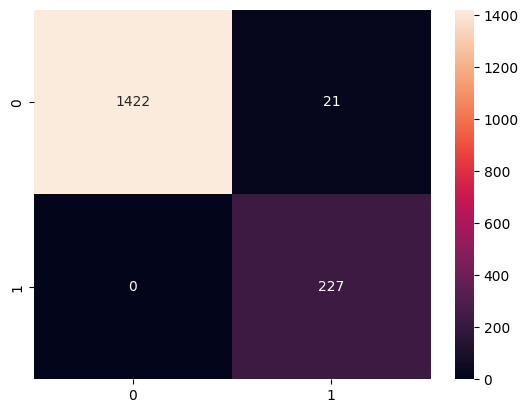

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_images)
predictions = numpy.round(predictions)
cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

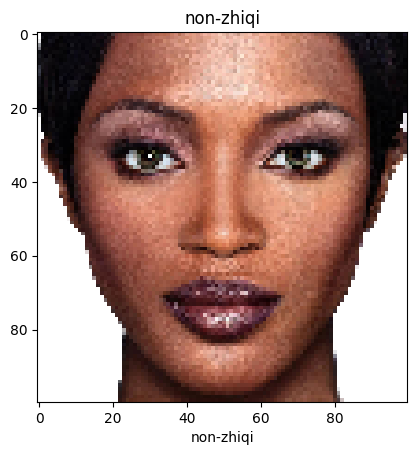

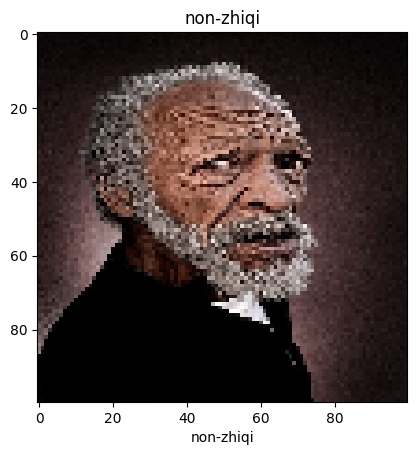

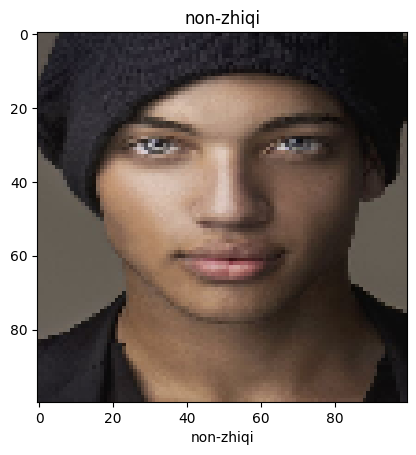

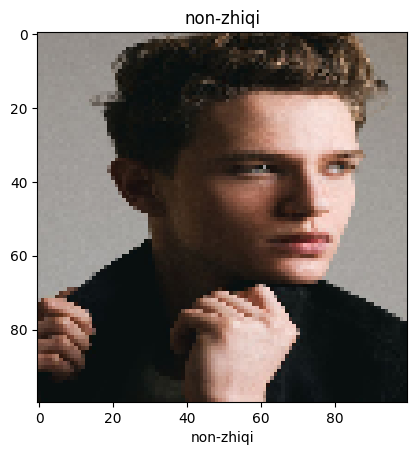

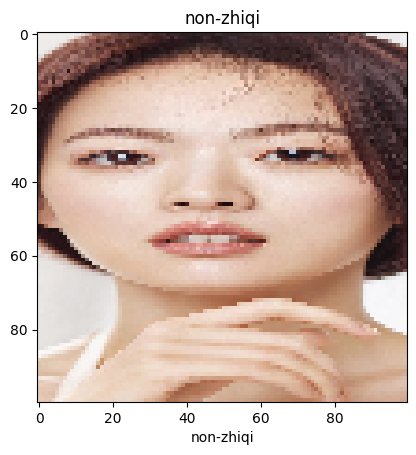

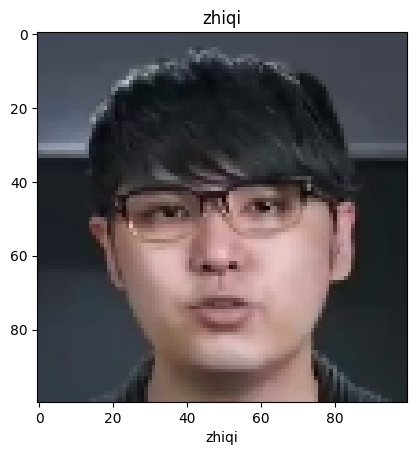

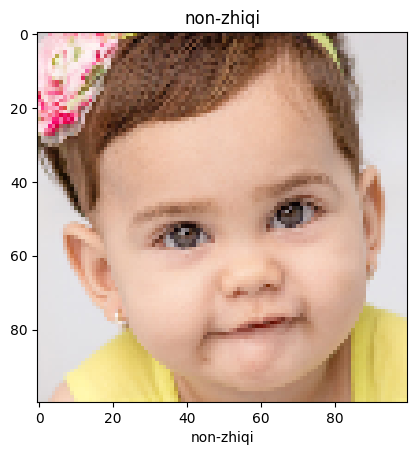

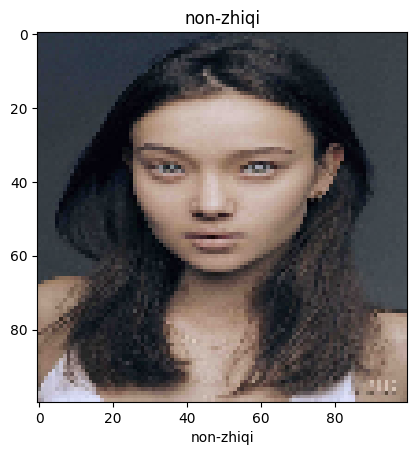

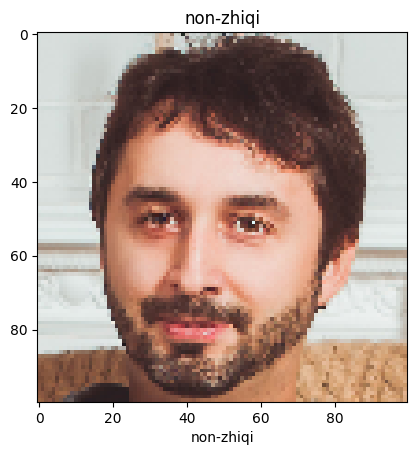

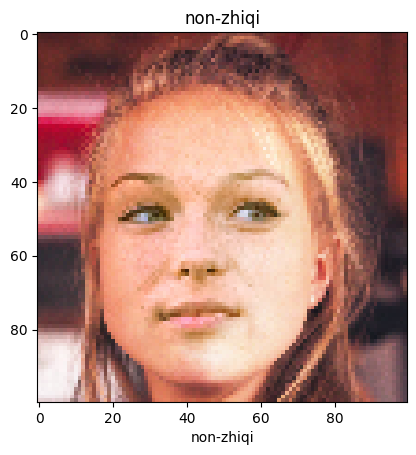

In [47]:
for i in range(10):
    rand = random.randint(0, len(test_images))
    img = cv2.cvtColor(test_images[rand], cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[rand]])
    plt.title(class_names[predictions[rand][0]])
    plt.show()

In [48]:
model.save("./models/face_rec.h5")

/usr/local/Caskroom/miniconda/base/envs/py39/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
